In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
d12=np.linspace(0, 0.15, 100)
sm2=np.linspace(0, 0.15, 100)
N1=np.loadtxt('N1hmD1_04.txt', delimiter=',')
N2=np.loadtxt('N2hmD1_04.txt', delimiter=',')
for i in range(N1.shape[0]):
    for j in range(N1.shape[1]):
        if math.isnan(N1[i][j]):
            N1[i][j]=N1[i][j+1]
for i in range(N2.shape[0]):
    for j in range(N2.shape[1]):
        if math.isnan(N2[i][j]):
            N2[i][j]=N2[i][j+1]
            
#N1=np.fliplr(N1)
#N2=np.fliplr(N2)

In [3]:
def ExitenceParser(first, second, level=0.01):
    if (first<level) and (second<level):
        return 0
    if (first>=level) and (second<level):
        return 1
    if (first<level) and (second>=level):
        return 2
    if (first>=level) and (second>=level):
        return 3

In [4]:
mask=np.zeros(N1.shape)
for i in range(d12.shape[0]):
    for j in range(sm2.shape[0]):
        mask[i][j]=ExitenceParser(N1[i][j], N2[i][j])

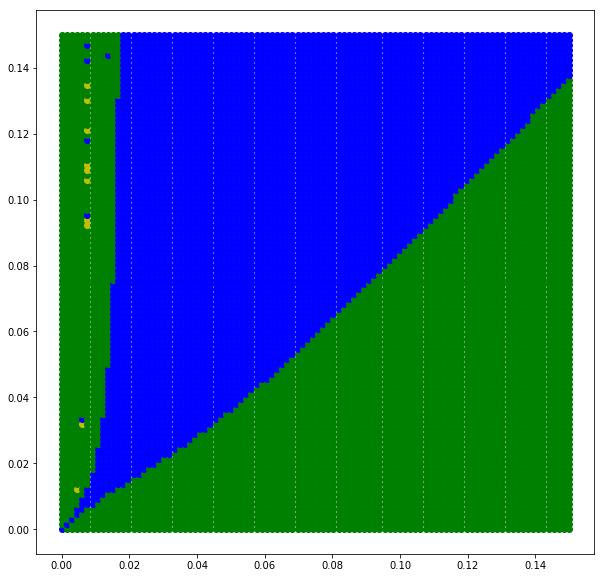

In [5]:
plt.figure(figsize=(10,10))
for i in range(d12.shape[0]):
    for j in range(sm2.shape[0]):
        if mask[i][j]==0:
            plt.plot(d12[i], sm2[j], 'ro')
        if mask[i][j]==1:
            plt.plot(d12[i], sm2[j], 'yo')
        if mask[i][j]==2:
            plt.plot(d12[i], sm2[j], 'bo')
        if mask[i][j]==3:
            plt.plot(d12[i], sm2[j], 'go')
        
plt.show()

In [6]:
def neighbours(i, j, lx, ly):
    ans=[]
    if j>0:
        ans.append((i,j-1))
    if j<ly-1:
        ans.append((i,j+1))
    if i>0:
        ans.append((i-1,j))
    if i<lx-1:
        ans.append((i+1,j))
    return ans

In [7]:
border=[]

for i in range(d12.shape[0]):
    for j in range(sm2.shape[0]):
        nei=neighbours(i, j, d12.shape[0], sm2.shape[0])
        for a in nei:
            if mask[a[0]][a[1]] != mask[i][j]:
                border.append((i,j))

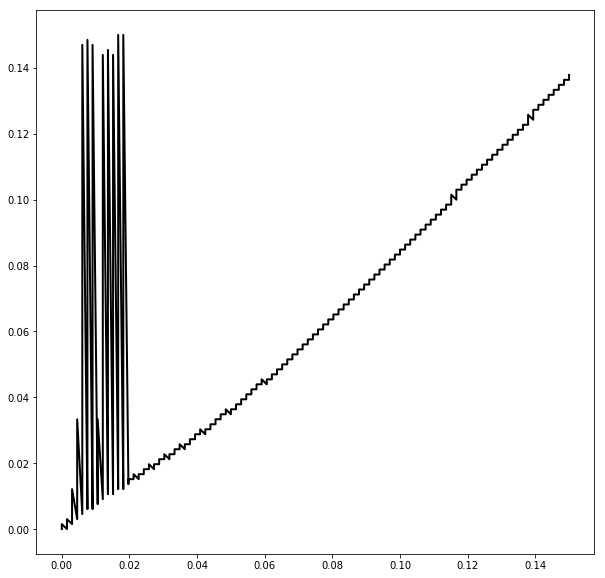

In [8]:
plt.figure(figsize=(10,10))
x, y=zip(*border)
x=np.array(x)
y=np.array(y)
lines=plt.plot(d12[x], sm2[y])
plt.setp(lines, color='k', linewidth=2.0)
plt.show()

In [9]:
border

[(0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 2),
 (1, 2),
 (2, 1),
 (2, 1),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 3),
 (2, 3),
 (2, 4),
 (2, 8),
 (3, 2),
 (3, 2),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 4),
 (3, 4),
 (3, 5),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 8),
 (3, 8),
 (3, 8),
 (3, 9),
 (3, 21),
 (3, 22),
 (4, 3),
 (4, 3),
 (4, 4),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 6),
 (4, 7),
 (4, 7),
 (4, 8),
 (4, 8),
 (4, 20),
 (4, 21),
 (4, 21),
 (4, 21),
 (4, 21),
 (4, 22),
 (4, 22),
 (4, 22),
 (4, 22),
 (4, 23),
 (4, 61),
 (4, 62),
 (4, 63),
 (4, 70),
 (4, 72),
 (4, 73),
 (4, 78),
 (4, 80),
 (4, 86),
 (4, 89),
 (4, 94),
 (4, 97),
 (5, 4),
 (5, 4),
 (5, 5),
 (5, 7),
 (5, 8),
 (5, 8),
 (5, 9),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 21),
 (5, 22),
 (5, 60),
 (5, 61),
 (5, 61),
 (5, 61),
 (5, 62),
 (5, 62),
 (5, 62),
 (5, 63),
 (5, 63),
 (5, 63),
 (5, 63),
 (5, 64),
 (5, 69),
 (5, 70),
 (5, 70),
 (5, 70),
 (5, 70),
 (5, 71),
 (5, 71),
 (5, 72),
 (5, 72

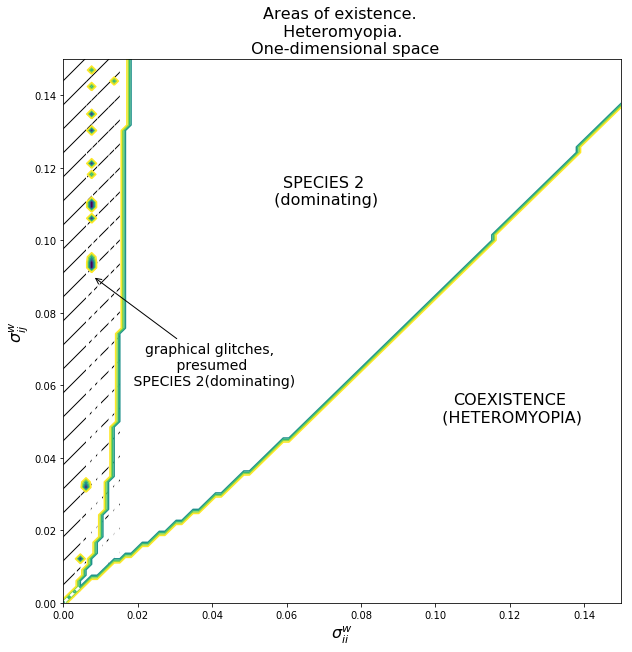

In [10]:
X, Y = np.meshgrid(d12, sm2)

plt.figure(figsize=(10,10))
CS = plt.contour(X, Y, mask.T)
#plt.clabel(CS, inline=1, fontsize=10)
plt.title('Areas of existence. \n Heteromyopia. \n One-dimensional space', fontsize=16)
#plt.text(0.0004, 0.175, r'SPECIES 1 (colonizator)', fontsize=16)

plt.text(0.12, 0.05, 'COEXISTENCE\n (HETEROMYOPIA)', fontsize=16, ha='center')
plt.text(0.07, 0.11, 'SPECIES 2\n (dominating)', fontsize=16, ha='center')

top=[]
for x in border:
    if d12[x[0]]<0.016:
        top.append(x)
x2, y2=zip(*top)
x2=np.array(x2)
y2=np.array(y2)
plt.fill_between(d12[x2], sm2[y2], 0.15,  alpha=0, hatch='/')
plt.annotate('graphical glitches, \n presumed \n SPECIES 2(dominating)', fontsize=14, xy=(0.008, 0.09), xytext=(0.04, 0.06),
            arrowprops=dict(facecolor='black', arrowstyle="->",
                            connectionstyle="arc3"), ha='center'
            )

plt.xlabel('$\sigma^w_{ii}$', fontsize=16)
plt.ylabel('$\sigma^w_{ij}$', fontsize=16)
plt.show()